# Hiperparametrizacion para Clasificación: Accidentes de transito Envigado

1. Preparación de Datos
2. División de los Datos
3. Hiperparametrización con el 70%
4. Evaluación del mejor Modelo con el 30%
5. Guardar el Modelo

In [19]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
import pandas as pd

data = pd.read_csv("Accidentalidad_Envigado_limpio.csv")
data.head()

,RADICADO,FECHA,HORA,DÍA DE LA SEMANA,ESTADO DE BEODEZ,RESULTADO DE BEODEZ,GRAVEDAD,CLASE DE ACCIDENTE,CAUSA,BARRIO,AREA
0,2134024,1/01/2014,10:30:00 p. m.,Miércoles,0,0,HERIDOS,CHOQUE,Otra-Conductor,LAS FLORES,URBANA
1,2134026,1/01/2014,11:30:00 p. m.,Miércoles,0,0,SOLO DAÑOS,CHOQUE,Desobedecer señales,LAS VEGAS,URBANA
2,2134027,1/01/2014,9:40:00 p. m.,Miércoles,0,0,HERIDOS,ATROPELLO,Otra-Conductor,LAS VEGAS,URBANA
3,2140005,1/01/2014,7:50:00 p. m.,Miércoles,0,0,HERIDOS,CHOQUE,Otra-Conductor,EL SALADO,URBANA
4,2134041,2/01/2014,7:10:00 p. m.,Jueves,0,0,SOLO DAÑOS,CHOQUE,Otra-Conductor,OBRERO,URBANA


In [21]:
data = data.sample(frac=0.05, random_state=42)  # 20% del dataset


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2188 entries, 14173 to 12536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   RADICADO             2188 non-null   int64 
 1   FECHA                2188 non-null   object
 2   HORA                 2188 non-null   object
 3   DÍA DE LA SEMANA     2188 non-null   object
 4   ESTADO DE BEODEZ     2188 non-null   int64 
 5   RESULTADO DE BEODEZ  2188 non-null   int64 
 6   GRAVEDAD             2188 non-null   object
 7   CLASE DE ACCIDENTE   2188 non-null   object
 8   CAUSA                2188 non-null   object
 9   BARRIO               2188 non-null   object
 10  AREA                 2188 non-null   object
dtypes: int64(3), object(8)
memory usage: 205.1+ KB


In [23]:
#Corregir tipos de datos (Object ->Category )
data['FECHA']=data['FECHA'].astype('category')
data['HORA']=data['HORA'].astype('category')
data['DÍA DE LA SEMANA']=data['DÍA DE LA SEMANA'].astype('category')
data['GRAVEDAD']=data['GRAVEDAD'].astype('category')
data['CLASE DE ACCIDENTE']=data['CLASE DE ACCIDENTE'].astype('category')
data['CAUSA']=data['CAUSA'].astype('category')
data['BARRIO']=data['BARRIO'].astype('category')
data['AREA']=data['AREA'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2188 entries, 14173 to 12536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   RADICADO             2188 non-null   int64   
 1   FECHA                2188 non-null   category
 2   HORA                 2188 non-null   category
 3   DÍA DE LA SEMANA     2188 non-null   category
 4   ESTADO DE BEODEZ     2188 non-null   int64   
 5   RESULTADO DE BEODEZ  2188 non-null   int64   
 6   GRAVEDAD             2188 non-null   category
 7   CLASE DE ACCIDENTE   2188 non-null   category
 8   CAUSA                2188 non-null   category
 9   BARRIO               2188 non-null   category
 10  AREA                 2188 non-null   category
dtypes: category(8), int64(3)
memory usage: 192.7 KB


In [24]:
# Por ejemplo, eliminar 'BARRIO' y 'AREA' antes de hacer dummies
data.drop(columns=['BARRIO', 'AREA'], inplace=True)


In [25]:
#Sklearn sólo analiza variables numéricas
data = pd.get_dummies(data, columns=['FECHA','HORA','DÍA DE LA SEMANA','CLASE DE ACCIDENTE', 'CAUSA', ], drop_first=False, dtype=int)
data.head()

,RADICADO,ESTADO DE BEODEZ,RESULTADO DE BEODEZ,GRAVEDAD,FECHA_1/02/2014,FECHA_1/02/2016,FECHA_1/02/2017,FECHA_1/03/2015,FECHA_1/03/2017,FECHA_1/04/2014,...,CAUSA_Subirse al anden o vias Peatonales,CAUSA_Superficie humeda,CAUSA_Superficie lisa,CAUSA_Transitar con las puertas abiertas,CAUSA_Transitar en contravia,CAUSA_Transitar entre vehiculos,CAUSA_Transitar por la calzada,CAUSA_Transitar por vias prohibidas,CAUSA_Transporte de carga sin seguridad,CAUSA_Vehiculo mal estacionado
14173,2102997,0,0,SOLO DAÑOS,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8231,2162053,0,0,SOLO DAÑOS,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6211,2153611,0,0,SOLO DAÑOS,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33530,2183093,0,0,SOLO DAÑOS,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18609,2120195,0,0,HERIDOS,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2188 entries, 14173 to 12536
Columns: 2320 entries, RADICADO to CAUSA_Vehiculo mal estacionado
dtypes: category(1), int64(2319)
memory usage: 38.7 MB


In [27]:
#Se codifican las categorias de la VARIABLE OBJETIVO
#Solo se hacen en clasificación

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["GRAVEDAD"]=labelencoder.fit_transform(data["GRAVEDAD"])

data.head()

,RADICADO,ESTADO DE BEODEZ,RESULTADO DE BEODEZ,GRAVEDAD,FECHA_1/02/2014,FECHA_1/02/2016,FECHA_1/02/2017,FECHA_1/03/2015,FECHA_1/03/2017,FECHA_1/04/2014,...,CAUSA_Subirse al anden o vias Peatonales,CAUSA_Superficie humeda,CAUSA_Superficie lisa,CAUSA_Transitar con las puertas abiertas,CAUSA_Transitar en contravia,CAUSA_Transitar entre vehiculos,CAUSA_Transitar por la calzada,CAUSA_Transitar por vias prohibidas,CAUSA_Transporte de carga sin seguridad,CAUSA_Vehiculo mal estacionado
14173,2102997,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8231,2162053,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6211,2153611,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33530,2183093,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18609,2120195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='GRAVEDAD'>

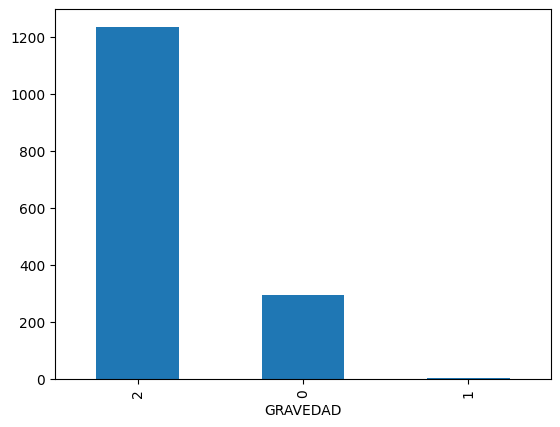

In [28]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("GRAVEDAD", axis = 1) # Variables predictoras
Y = data['GRAVEDAD'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')

In [29]:
#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])

In [30]:
#  Arbol
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier()

# Definir los hiperparametros
criterion=['entropy','gini'] #Indice de información
min_samples_leaf=[2,10,50,100] # Cantidad de registros por hoja
max_depth=[None, 10,20,50] #Niveles de profundidad

In [31]:
#Hiperparametrización
from sklearn.model_selection import GridSearchCV

param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
grid = GridSearchCV(estimator=modelTree, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=3) #cv=10
grid.fit(X_train, Y_train) #70%

#Mejor modelo
modelTree= grid.best_estimator_


medidas['Tree']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 50}
                 Tree
f1 de la CV  0.518669


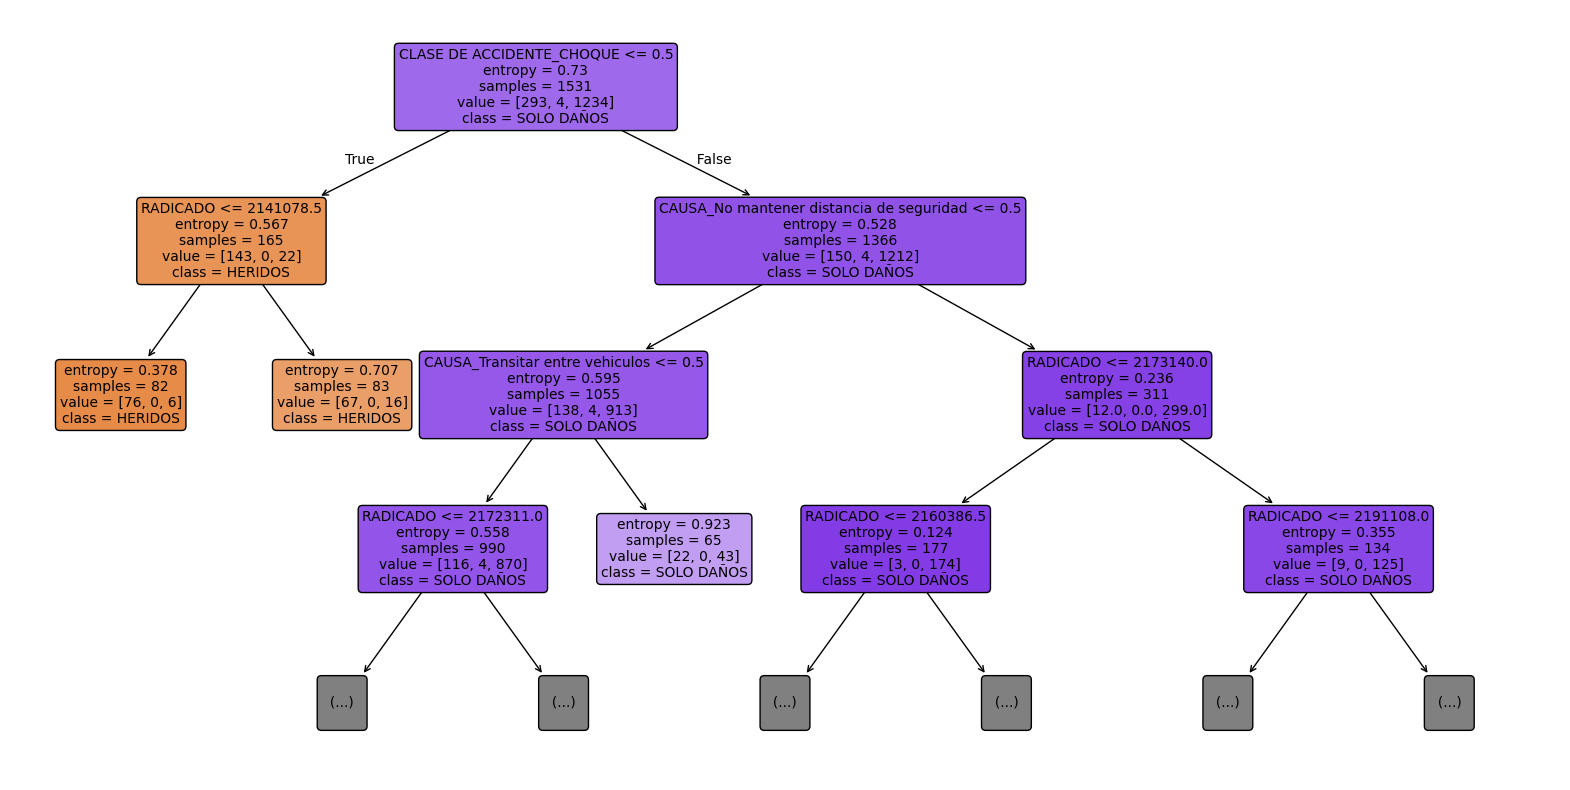

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Tamaño más grande
plot_tree(modelTree,
          feature_names=X_train.columns.values,
          class_names=labelencoder.classes_,
          rounded=True,
          filled=True,
          fontsize=10,
          max_depth=3)  # Mostrar solo 3 niveles
plt.show()


In [33]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
variables_numericas=['ESTADO DE BEODEZ', 'RESULTADO DE BEODEZ']
min_max_scaler.fit(data[variables_numericas]) #Ajuste de los parametros: max - min

#Se aplica la normalización a 70%  y la del 30% se hace mas adelante
X_train[variables_numericas]= min_max_scaler.transform(X_train[variables_numericas]) #70%

#La normalización de X_test se aplica mas adelante
X_train.head()

,RADICADO,ESTADO DE BEODEZ,RESULTADO DE BEODEZ,FECHA_1/02/2014,FECHA_1/02/2016,FECHA_1/02/2017,FECHA_1/03/2015,FECHA_1/03/2017,FECHA_1/04/2014,FECHA_1/06/2016,...,CAUSA_Subirse al anden o vias Peatonales,CAUSA_Superficie humeda,CAUSA_Superficie lisa,CAUSA_Transitar con las puertas abiertas,CAUSA_Transitar en contravia,CAUSA_Transitar entre vehiculos,CAUSA_Transitar por la calzada,CAUSA_Transitar por vias prohibidas,CAUSA_Transporte de carga sin seguridad,CAUSA_Vehiculo mal estacionado
12597,2101305,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4070,2151110,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41792,2212150,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21746,2123352,0.0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3563,2150555,0.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#KNN
from sklearn.neighbors  import KNeighborsClassifier
modelKnn = KNeighborsClassifier()

# Definir los hiperparametros
n_neighbors=[1,3,5,7,13,27]
metric=['euclidean','minkowski']

#Grid
param_grid = dict(n_neighbors=n_neighbors, metric=metric)
grid = GridSearchCV(estimator=modelKnn, param_grid=param_grid, scoring='f1_macro', n_jobs=-1,cv=10)
grid.fit(X_train, Y_train) #70%

#Mejor modelo
modelKnn= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas['Knn']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


{'metric': 'euclidean', 'n_neighbors': 3}
                 Tree       Knn
f1 de la CV  0.518669  0.459168


Parametrizacion de la red neuronal

In [38]:
#Red Neuronal

from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier()


# Definir los parametros
random_state=[1] #Semilla para generar número pseudoaleatorios
solver=['sgd'] # Regla de aprendizaje ['adam','sgd','lbfgs']
learning_rate=['constant','adaptive'] #tasa de aprendizaje
learning_rate_init=[0.2, 0.5] #valor tasa de aprendizaje
momentum=[0.3, 0.5] #momentum
activation=['logistic', 'relu'] #'identity’, ‘logistic’, ‘tanh’, ‘relu’
hidden_layer_sizes=[10,20] # neuronas de la capa oculta (input+output/2)
max_iter = [50,100] #iteraciones

#Grid
param_grid = dict(random_state=random_state,solver=solver,activation=activation, hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, learning_rate=learning_rate,
                  learning_rate_init=learning_rate_init, momentum=momentum)
grid = GridSearchCV(estimator=modelNN, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=3)
grid.fit(X_train, Y_train)

#Mejor modelo
modelNN= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas['NN']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'activation': 'logistic', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'learning_rate_init': 0.2, 'max_iter': 50, 'momentum': 0.3, 'random_state': 1, 'solver': 'sgd'}
                 Tree       Knn        NN
f1 de la CV  0.518669  0.459168  0.297529


#Hiperparámetros soporte vectorial

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd

# Inicializar el modelo base
modelSVM = SVC()

# =============================
# Grid de hiperparámetros optimizado
# =============================
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10]  # 'linear' no usa gamma
    },
    {
        'kernel': ['rbf'],
        'C': [1, 10],
        'gamma': ['scale', 0.01]  # gamma solo para kernels no lineales
    },
    {
        'kernel': ['poly'],
        'C': [1],
        'gamma': ['scale'],
        'degree': [2]  # Opcional: puedes probar otro grado si quieres
    }
]

# =============================
# GridSearchCV
# =============================
grid = GridSearchCV(estimator=modelSVM,
                    param_grid=param_grid,
                    scoring='f1_macro',
                    n_jobs=-1,
                    cv=3)

# Entrenamiento
grid.fit(X_train, Y_train)

# =============================
# Mejor modelo y evaluación
# =============================
modelSVM = grid.best_estimator_
medidas['SVM'] = grid.best_score_

# Mostrar resultados
print("Mejores parámetros encontrados:")
print(grid.best_params_)
print("\nF1 macro del mejor modelo:", grid.best_score_)

print("\nMedidas finales:")
print(medidas)

# (Opcional) Evaluación final en test
Y_pred = modelSVM.predict(X_test)
print("\nReporte de clasificación en test:")
print(classification_report(Y_test, Y_pred))


KeyboardInterrupt: 

#4. Evaluación sobre el 30% de los datos

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     HERIDOS       0.88      0.47      0.61       126
     MUERTOS       0.00      0.00      0.00         2
  SOLO DAÑOS       0.88      0.99      0.93       529

    accuracy                           0.88       657
   macro avg       0.59      0.49      0.51       657
weighted avg       0.88      0.88      0.87       657



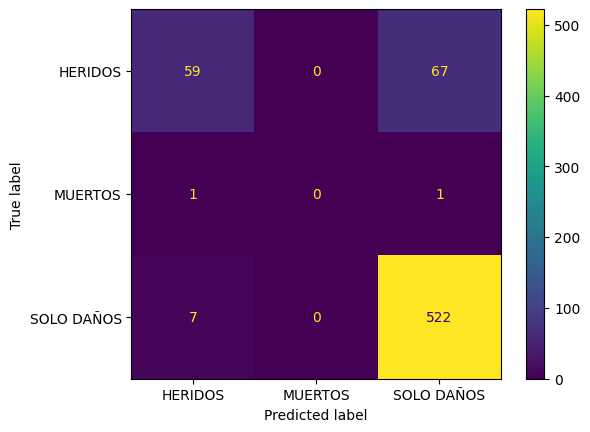

In [55]:
#Evaluación del mejor Tree con el 30% (X_test sin normalizar)
from sklearn import metrics

Y_pred = modelTree.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
#metrics.RocCurveDisplay.from_estimator(modelTree,X_test, Y_test) Solo sirve para 2 variables


In [45]:
#X_test se normaliza para lo otros métodos
X_test[variables_numericas]= min_max_scaler.transform(X_test[variables_numericas])  #30%
X_test

,RADICADO,ESTADO DE BEODEZ,RESULTADO DE BEODEZ,FECHA_1/02/2014,FECHA_1/02/2016,FECHA_1/02/2017,FECHA_1/03/2015,FECHA_1/03/2017,FECHA_1/04/2014,FECHA_1/06/2016,...,CAUSA_Subirse al anden o vias Peatonales,CAUSA_Superficie humeda,CAUSA_Superficie lisa,CAUSA_Transitar con las puertas abiertas,CAUSA_Transitar en contravia,CAUSA_Transitar entre vehiculos,CAUSA_Transitar por la calzada,CAUSA_Transitar por vias prohibidas,CAUSA_Transporte de carga sin seguridad,CAUSA_Vehiculo mal estacionado
40712,2211062,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38274,2200705,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40514,2210859,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18723,2120327,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13452,2102278,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37829,2200223,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30211,2173705,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18464,2120065,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
343,2140370,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     HERIDOS       0.15      0.08      0.10       126
     MUERTOS       0.00      0.00      0.00         2
  SOLO DAÑOS       0.80      0.89      0.84       529

    accuracy                           0.73       657
   macro avg       0.32      0.32      0.32       657
weighted avg       0.67      0.73      0.70       657



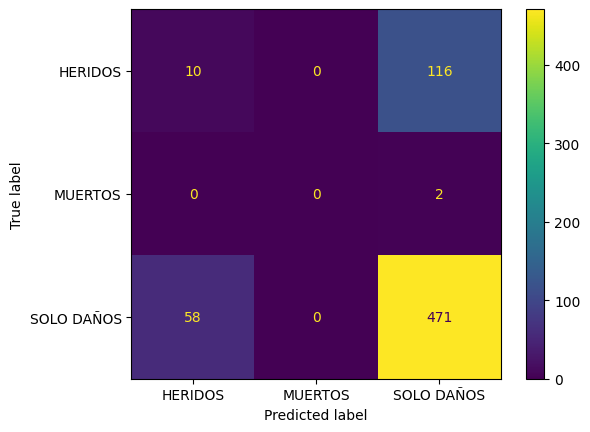

In [47]:
#Evaluación de Knn
from sklearn import metrics

Y_pred = modelKnn.predict(X_test)

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
#metrics.RocCurveDisplay.from_estimator(modelKnn,X_test, Y_test) Solo se puede para 2 parámetros

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     HERIDOS       0.00      0.00      0.00       126
     MUERTOS       0.00      0.00      0.00         2
  SOLO DAÑOS       0.81      1.00      0.89       529

    accuracy                           0.81       657
   macro avg       0.27      0.33      0.30       657
weighted avg       0.65      0.81      0.72       657



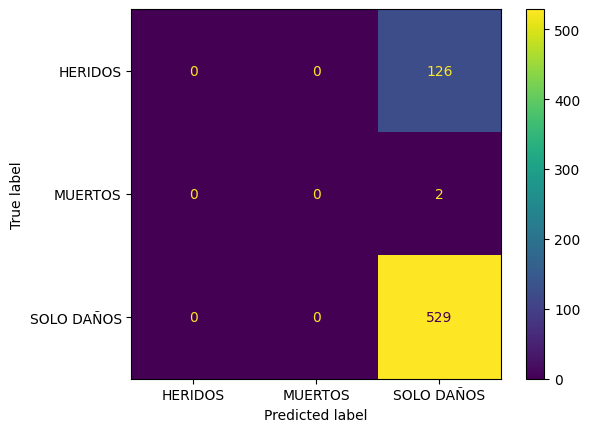

In [48]:
#Evaluación de Red Neuronal
from sklearn import metrics

Y_pred = modelNN.predict(X_test)

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
#metrics.RocCurveDisplay.from_estimator(modelNN,X_test, Y_test) Solo se puede para 2 parámetros

In [ ]:
#Evaluación de SVM
from sklearn import metrics

Y_pred = modelSVM.predict(X_test)

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelSVM,X_test, Y_test)

In [49]:
import pickle
filename = 'modelo-clas-hiper.pkl'
variables= X.columns._values
#El árbol es más rápido computacionalmente
pickle.dump([modelTree,labelencoder,variables,min_max_scaler], open(filename, 'wb')) #write

In [56]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
clases_accidente = ['CHOQUE', 'ATROPELLO', 'CAIDA OCUPANTE']
causas = ['Otra-Conductor', 'Desobedecer señales', 'No mantener distancia de seguridad',
          'Subirse al anden o vias Peatonales', 'No respetar prelacion']
barrios = ['LAS FLORES', 'LAS VEGAS', 'EL SALADO', 'OBRERO', 'MESA', 'EL DORADO',
          'ZONA CENTRO', 'VILLA GRANDE', 'ZUÑIGA', 'EL CHOCHO', 'BOSQUES DE ZUÑIGA', 'SAN JOSE',
          'VEREDA EL ESCOBERO', 'PRIMAVERA']
areas = ['URBANA']

def generar_hora():
    hora = random.randint(1, 12)
    minuto = random.randint(0, 59)
    segundo = random.randint(0, 59)
    periodo = random.choice(['a. m.', 'p. m.'])
    return f"{hora}:{minuto:02d}:{segundo:02d} {periodo}"

fecha_inicio = datetime.strptime('2025-01-01', '%Y-%m-%d')
num_filas = 50

datos = []
for i in range(num_filas):
    radicado = 2200000 + i
    fecha = (fecha_inicio + timedelta(days=i)).strftime('%d/%m/%Y')
    hora = generar_hora()
    dia_semana = dias_semana[(fecha_inicio + timedelta(days=i)).weekday()]
    estado_beodez = 0
    resultado_beodez = 0
    clase_accidente = random.choice(clases_accidente)
    causa = random.choice(causas)
    barrio = random.choice(barrios)
    area = 'URBANA'
    datos.append([radicado, fecha, hora, dia_semana, estado_beodez, resultado_beodez,
                  clase_accidente, causa, barrio, area])

df_futuros = pd.DataFrame(datos, columns=[
    'RADICADO', 'FECHA', 'HORA', 'DÍA DE LA SEMANA', 'ESTADO DE BEODEZ', 'RESULTADO DE BEODEZ',
    'CLASE DE ACCIDENTE', 'CAUSA', 'BARRIO', 'AREA'])

print(df_futuros.head())


   RADICADO       FECHA           HORA DÍA DE LA SEMANA  ESTADO DE BEODEZ  \
0   2200000  01/01/2025  3:47:04 a. m.        Miércoles                 0   
1   2200001  02/01/2025  1:17:44 a. m.           Jueves                 0   
2   2200002  03/01/2025  4:51:13 p. m.          Viernes                 0   
3   2200003  04/01/2025  2:02:00 a. m.           Sábado                 0   
4   2200004  05/01/2025  4:29:58 p. m.          Domingo                 0   

   RESULTADO DE BEODEZ CLASE DE ACCIDENTE                               CAUSA  \
0                    0             CHOQUE                 Desobedecer señales   
1                    0          ATROPELLO  Subirse al anden o vias Peatonales   
2                    0     CAIDA OCUPANTE  Subirse al anden o vias Peatonales   
3                    0             CHOQUE  Subirse al anden o vias Peatonales   
4                    0     CAIDA OCUPANTE  No mantener distancia de seguridad   

        BARRIO    AREA  
0    PRIMAVERA  URBANA  


In [57]:
df_futuros.to_csv("datos_futuros_sin_gravedad.csv", index=False)
print("Archivo guardado como datos_futuros_sin_gravedad.csv")


Archivo guardado como datos_futuros_sin_gravedad.csv
